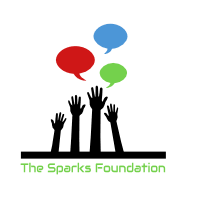
<h3 align="center"> Graduate Rotational Internship Programme </h3>          

<h3 align="center">The Sparks Foundation </h3>          

# TASK_2

## Explore Supervised Machine Learning¶

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variable
                            
                        


In [2]:
# Download all the dependencies that we will need.
import numpy as np   # library to handle data in a vectorized manner
import pandas as pd   # library for data analsysis 
import matplotlib.pyplot as plt  
%matplotlib inline
print("Required Libraries Imported successfully ")

Required Libraries Imported successfully 


In [3]:
link = "http://bit.ly/w-data"
dataset = pd.read_csv(link)
print("Data imported.")  
dataset.head()  

Data imported.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Exploration
Now, lets take descriptive exploration of our dataset.

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
dataset.shape

(25, 2)

## Data Visualization
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

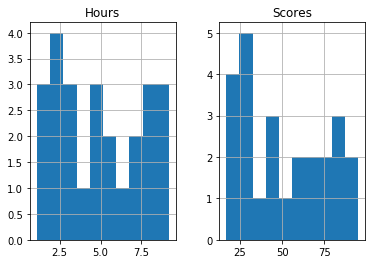

In [10]:
# Lets select these features to explore more.
# we can plot each of these features:
viz = dataset[['Hours','Scores']]
viz.hist()
plt.show()

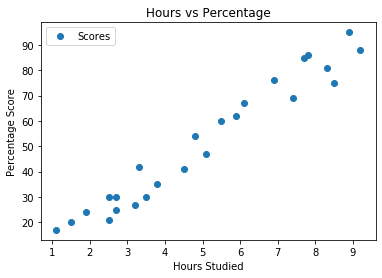

In [13]:
# Now, lets plot each of these Scores vs the Hours, to see how linear is their relation:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [17]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values 

In [119]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [120]:
y_test.shape

(5,)

In [121]:
X_test.shape

(5, 1)

In [122]:
y_train.shape

(20,)

In [123]:
y_train.shape

(20,)

## Training the Algorithm
We have successfully splited our data into training and testing sets.
Finally, it's time to train our algorithm.

Firstly, importing of sklearn.linear_model is required for us to access LinearRegression. It then needs to be instantiated and model fit to our training data.

In [124]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[20.   16.88]
 [27.   33.73]
 [69.   75.36]
 [30.   26.79]
 [62.   60.49]]


In [126]:
dt=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
dt

,y_test,y_pred
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [127]:
slope=regressor.coef_
y_intercept=regressor.intercept_
line=(slope*x)+y_intercept                   # Line_Eqn

## Plotting

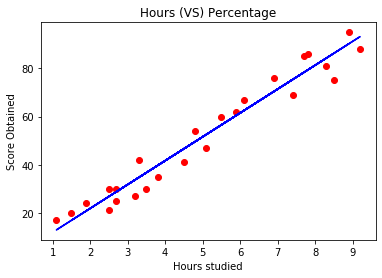

In [128]:
plt.scatter(x,y,c='r')
plt.plot(x,line,c='b')
plt.title("Hours (VS) Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Obtained")
plt.show()

## Making Predictions

In [129]:
hour=9.25
percentage=regressor.predict([[hour]])
print("the student obtained {} percentage by studying {} hours".format(percentage[0],hour))

the student obtained 93.69173248737538 percentage by studying 9.25 hours


## Evaluation
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [130]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
